# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [299]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

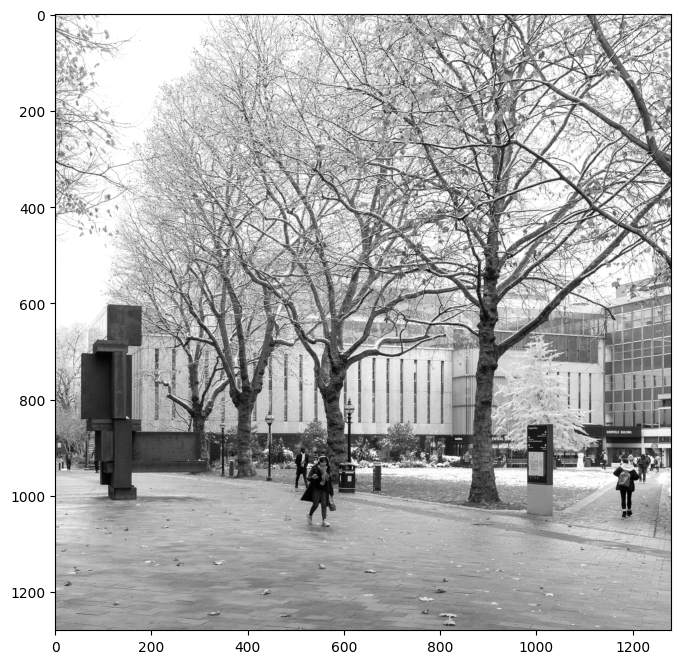

In [300]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

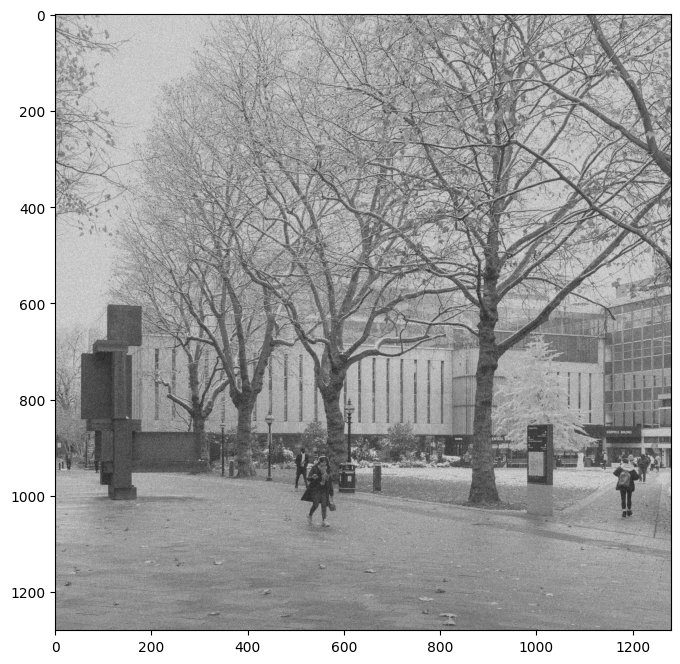

In [301]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)


### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


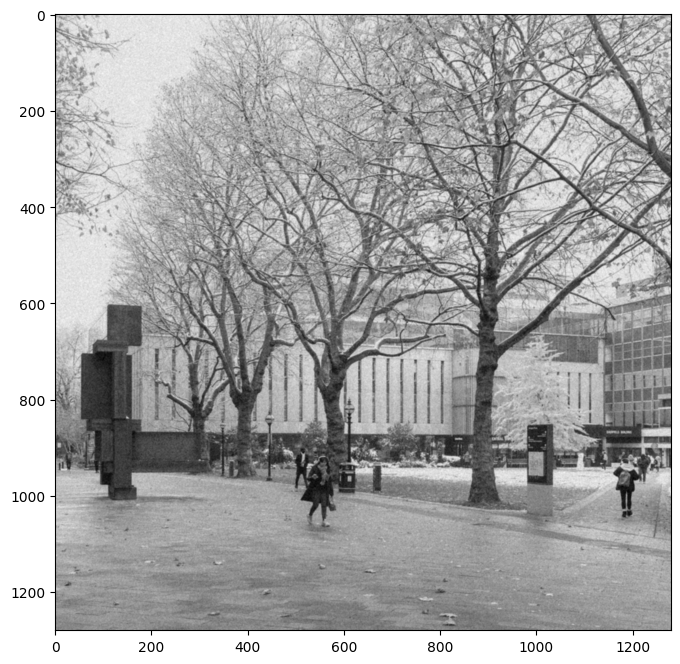

In [302]:
# Design the filter h
### Insert your code ###
kernel_size = 3  # Adjust the kernel size as needed
h = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)


# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='symm')

# Print the filter (provided)
print('Filter h:')
print(h)
# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

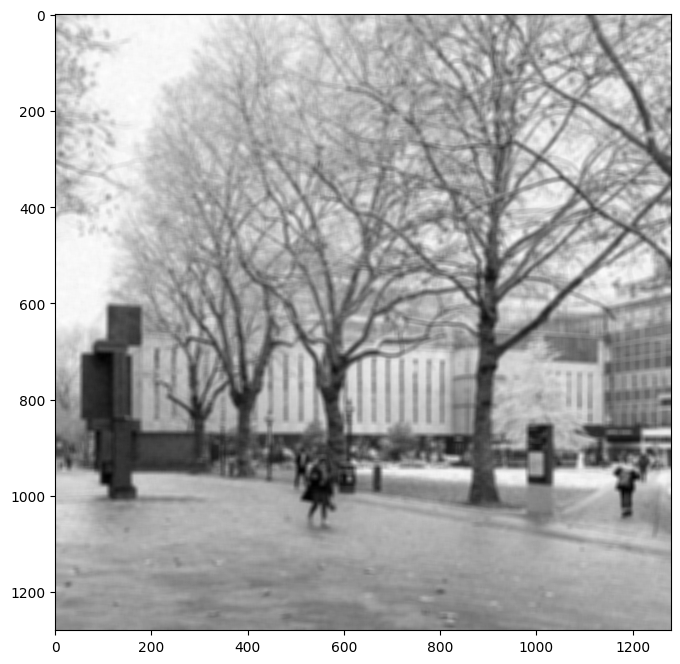

In [303]:
# Design the filter h
### Insert your code ###
kernel_size = 11 # Adjust the kernel size as needed
h = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='symm')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

We have implmented a moving average filter with kernal sizes of 3 and of 11. The kernel size of 11, which is larger, appears to produce a filtered image with much less noise compared the smaller kernel size of 3. However, it also produces a much blurrier image as each pixel in the new image is evaluated taking into account a much larger area of neighbouring pixels. The filtered image using the smaller kernel size of 3, while having more noise in the final result, produces a much clearer image.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

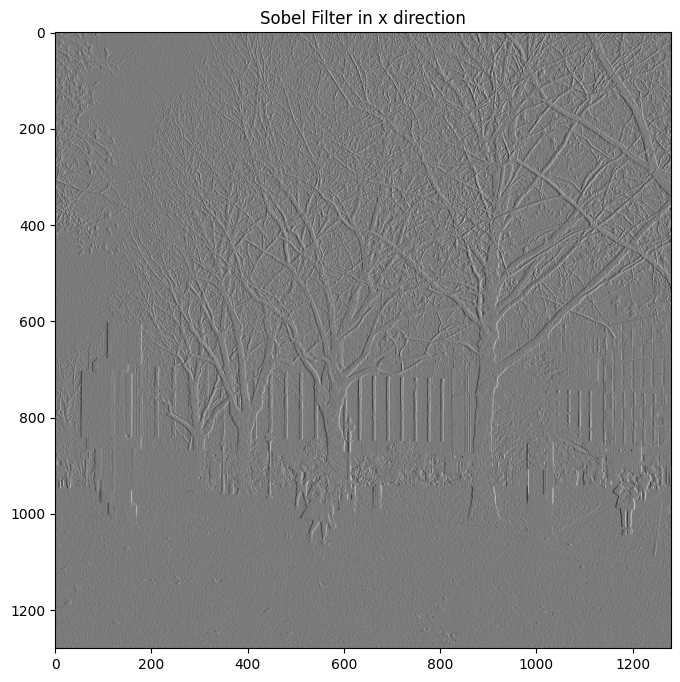

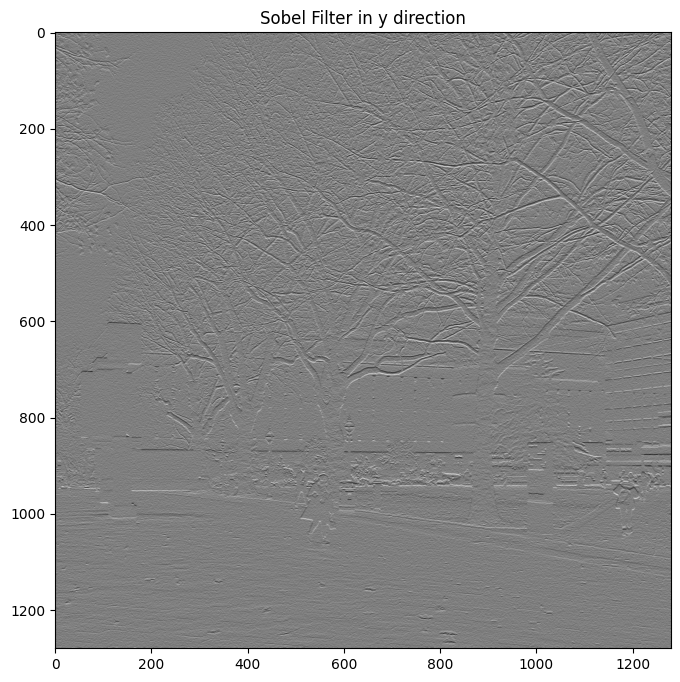

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


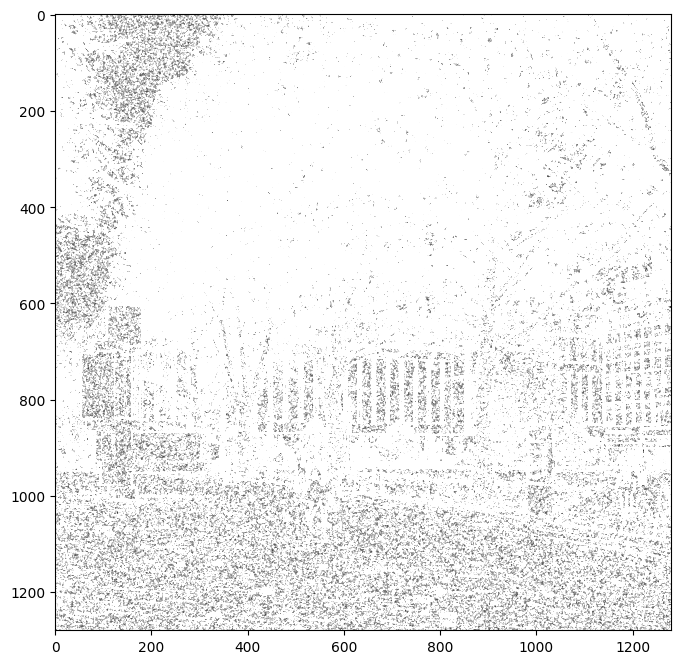

In [304]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])  # Sobel filter in x direction
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0], 
                    [-1, -2, -1]])  # Sobel filter in y direction

# Image filtering
### Insert your code ###
image_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same', boundary='symm')
image_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same', boundary='symm')


# Plot image_x
plt.imshow(image_x, cmap='gray')
plt.title('Sobel Filter in x direction')
plt.gcf().set_size_inches(8, 8)
plt.show()

# Plot image_y
plt.imshow(image_y, cmap='gray')
plt.title('Sobel Filter in y direction')
plt.gcf().set_size_inches(8, 8)
plt.show()

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(image_x ** 2 + image_y ** 2)
orientation = np.arctan2(image_y, image_x)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
# plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)
plt.show()


### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

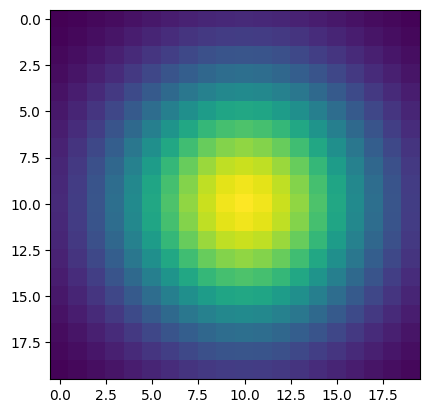

In [305]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    kernel_size = 20

    h = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2  # Compute the center of the kernel

    for i in range(kernel_size):
        for j in range(kernel_size):
            # Compute the distance from the center of the kernel
            distance = math.sqrt((i - center)**2 + (j - center)**2)
            h[i, j] = 1 / (2 * math.pi * sigma**2) * math.exp(-(distance**2) / (2 * sigma**2))

    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Time elapsed: 0.7139081954956055 seconds


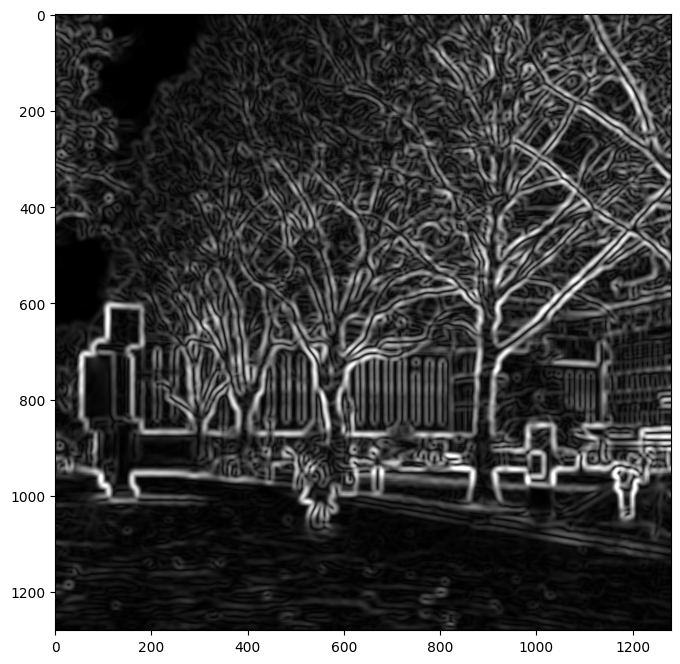

In [306]:
# Construct the Gaussian filter
### Insert your code ###
sigma = 5
gaussian_filter = gaussian_filter_2d(sigma)


# Perform Gaussian smoothing and count time
### Insert your code ###
start_time = time.time()
image_gaussian = scipy.signal.convolve2d(image, gaussian_filter, mode='same', boundary='symm')
end_time = time.time()
print('Time elapsed: {} seconds'.format(end_time - start_time))

# Image filtering
### Insert your code ###
image_x = scipy.signal.convolve2d(image_gaussian, sobel_x, mode='same', boundary='symm')
image_y = scipy.signal.convolve2d(image_gaussian, sobel_y, mode='same', boundary='symm')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(image_x ** 2 + image_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
# plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)
plt.show()


### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

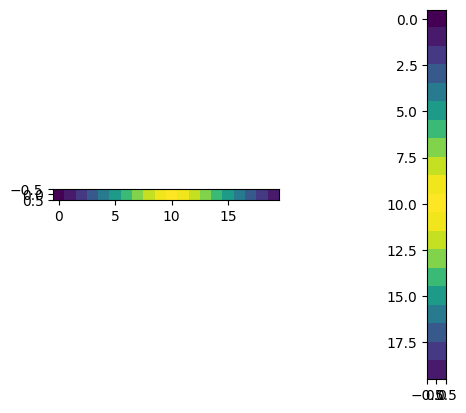

In [307]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    kernel_size = 20
    h = np.zeros((kernel_size, 1))
    center = kernel_size // 2  # Compute the center of the kernel
    for i in range(kernel_size):
        h[i] = 1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-((i - center)**2) / (2 * sigma**2))
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma).T

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma)


# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Time elapsed: 0.1530609130859375 seconds


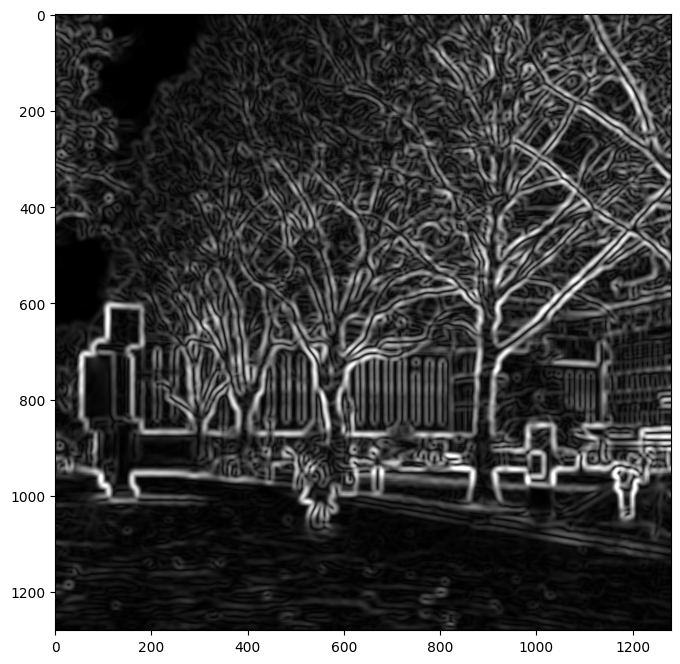

Mean difference: 2.396194890399333e-13


In [308]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###
start_time = time.time()
image_gaussian = scipy.signal.convolve2d(image, h_x, mode='same', boundary='symm')
image_gaussian = scipy.signal.convolve2d(image_gaussian, h_y, mode='same', boundary='symm')
end_time = time.time()
print(f'Time elapsed: {end_time - start_time} seconds')

# Image filtering
### Insert your code ###
image_x = scipy.signal.convolve2d(image_gaussian, sobel_x, mode='same', boundary='symm')
image_y = scipy.signal.convolve2d(image_gaussian, sobel_y, mode='same', boundary='symm')


# Calculate the gradient magnitude
### Insert your code ###
grad_mag2 = np.sqrt(image_x ** 2 + image_y ** 2)


# Display the gradient magnitude map (provided)

plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)
plt.show()

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###
print(f'Mean difference: {np.mean(np.abs(grad_mag - grad_mag2))}')


### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

We have produced an gradient map by just using sobel filtering along with using both Gaussian and Sobel filtering. The gradient map produced when only Sobel filtering has a lot of noise and does not show the edges clearly. This is even more apparent, when using the plt.imshow funciton with vmin and vmax set to 0 and 100 respectively. In the resulting image it is hard to even see the filtered image clearly.

However, when Gaussian smoothing is implemented first a lot of the noise in the initial image is removed before the Sobel filter is applied. The resulting gradient map has much clearer and well defined edges due to the noise being removed before the Sobel filter. While the Sobel filter seperable and is made up of a weighted average filter, which should do some smoothing, followed by a finite difference filter. The Guassian filter is much better at smoothign compared to the weighted average filter, as it takes in a larger amount of neighbouring pixels when evaluating the filtered image.

Lastly, the Guassian filter is implemented using both a 2D filter and using two 1D filters, in the x and y directions. This is mathematically the same filter as the Guassian filter is seperable and the convolution of the Guassian filter in the x and y directions is equivalent to the 2D Guassian filter. This mathematical equivalency is shown when we compute the mean difference between the two gradient maps produced by the 2D and 1D filters which is 2.3962e-13. This is effecitvely zero, hence proving that the filters are equivalent.

This appraoch is taken as the computation time of the 2D filter is 0.9298 seconds whereas when using two 1D filters the computational time is 0.1963 seconds. This is becuase given the kernel size K and image size N, in the 2D filter at each pixel there are K^2 multiplications, this is then done for all N^2 pixels. Meaning in total there at K^2N^2 mutliplications. Whereas, for the 1D filter there is only K multiplications at each pixel, which is then repeated for all N^2 pixels. This is then done twice due to there needing to be two 1D filters. Now there is only 2KN^2 mutliplications which is less than the K^2N^2 needed before, therefore reducing the computation time.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [309]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [310]:
# Expand the dimension of the numpy array
### Insert your code ###
image_noisy_expanded = np.expand_dims(image_noisy, axis=(0,1))

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
image_noisy_tensor = torch.from_numpy(image_noisy_expanded)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

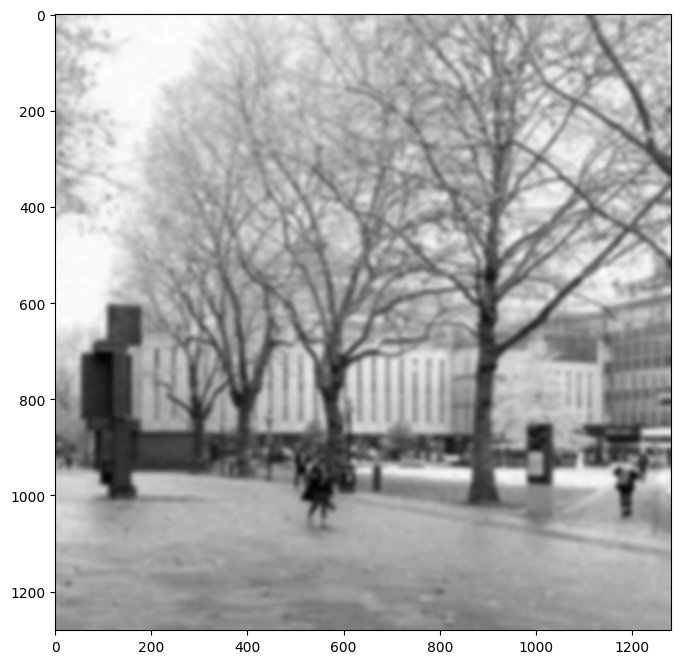

In [311]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
### Insert your code ###
conv = torch.nn.Conv2d(1, 1, kernel_size=20, padding = 10, padding_mode = 'reflect', bias=False)
conv.weight = torch.nn.Parameter(torch.from_numpy(np.expand_dims(h, axis=(0,1))))

# Filtering
### Insert your code ###
image_filtered = conv(image_noisy_tensor)
image_filtered = image_filtered.detach().numpy()[0,0,:,:]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

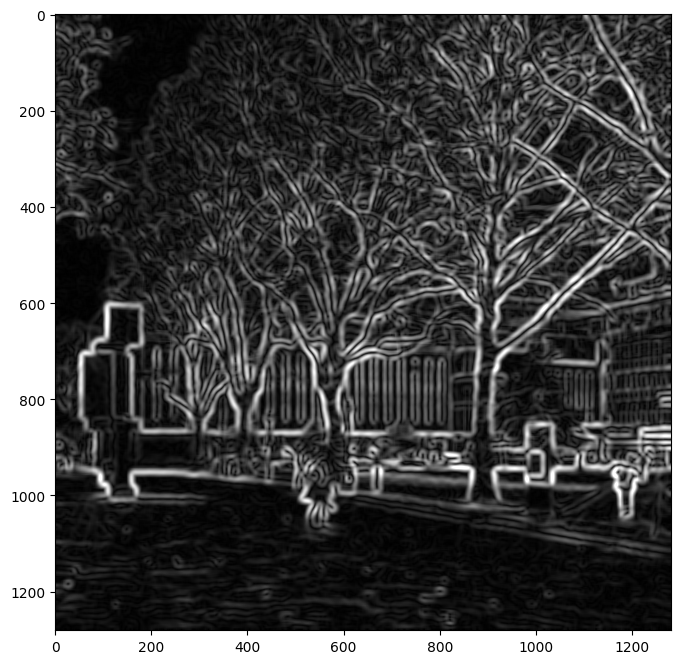

In [312]:
# Create Conv2D filters
### Insert your code ###
conv_x = torch.nn.Conv2d(1, 1, kernel_size=3, padding = 1, padding_mode = 'reflect', bias=False)
conv_y = torch.nn.Conv2d(1, 1, kernel_size=3, padding = 1, padding_mode = 'reflect', bias=False)

conv_x.weight = torch.nn.Parameter(torch.from_numpy(np.expand_dims(sobel_x.astype(np.float64), axis=(0,1))))
conv_y.weight = torch.nn.Parameter(torch.from_numpy(np.expand_dims(sobel_y.astype(np.float64), axis=(0,1))))

# Perform filtering
### Insert your code ###
image_gaussian = conv(image_noisy_tensor)

image_filtered_x = conv_x(image_gaussian).detach().numpy()[0,0,:,:]
image_filtered_y = conv_y(image_gaussian).detach().numpy()[0,0,:,:]

# Calculate the gradient magnitude map
### Insert your code ###
grad_mag3 = np.sqrt(image_filtered_x ** 2 + image_filtered_y ** 2)

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)